In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
import numpy as np
import scipy.stats as stats
from enum import Enum
np.random.seed(100)

In [39]:
class EventType(Enum):
    ARRIVAL = 0
    DEPARTURE = 1

In [40]:
class Event(object):
    def __init__(self, event_type, time):
        self.event_type = event_type
        self.time = time

In [41]:
class EventList(object):
    def __init__(self):
        self.events = []
        
    def __len__(self):
        return len(self.events)
        
    def is_empty(self):
        return len(self) == 0
        
    def get_first(self):
        first = self.events[0]
        return first
    
    def enqueue(self, event):
        self.events.append(event)
        self.sort()
    
    def dequeue(self):
        self.sort()
        first = self.get_first()
        self.events = self.events[1:]
        return first
    
    def sort(self):
        self.events = sorted(self.events, key=lambda x: x.time)
        self.events = list(self.events)
        

In [42]:
def interarrival_time():
    return int(np.ceil(np.random.exponential(12)))

def service_time():
    return int(np.ceil(np.random.exponential(8)))

def counts_to_table(counts):
    values = set(counts)
    l = float(len(counts))
    probs = dict()
    for v in values:
        probs[v] = len(counts[counts == v])/l
    return probs
        

In [43]:
# assuming a FCFS queue
# we log the arrival time, time of service, and departure time for each
# customer who enters Rituals
customer_arrival = []
customer_departure = []
customer_service = []
num_customers_system = [] # logs num customers for any particular point in time
num_customers_line = []
server_utilization = 0
event_list = EventList()
first_arrival = interarrival_time()
event_list.enqueue(Event(EventType.ARRIVAL, first_arrival))

time_to_simulate = 60 * 24 * 31
free = True
customers = 0
t = 0

In [44]:

while t < time_to_simulate:
    next_event = event_list.dequeue()
    lt = t
    t = next_event.time
    if t > time_to_simulate:
        break
    diff = t - lt
    num_customers_line.extend([customers] * (diff - 1))
    if free:
        num_customers_system.extend([0] * (diff - 1))
    else:
        num_customers_system.extend([customers + 1] * (diff - 1))
    if next_event.event_type == EventType.ARRIVAL:
        customer_arrival.append(t)
        customers += 1
        if free:
            free = False
            customer_service.append(t)
            customers -= 1
            d_time = service_time() + t
            event_list.enqueue(Event(EventType.DEPARTURE, d_time))
        next_arrival_time = interarrival_time() + t
        arrival_event = Event(EventType.ARRIVAL, next_arrival_time)
        event_list.enqueue(arrival_event)
    elif next_event.event_type == EventType.DEPARTURE:
        customer_departure.append(t)
        free = True
        if customers > 0:
            free = False
            customer_service.append(t)
            customers -= 1
            next_dept_time = t + service_time()
            dept_event = Event(EventType.DEPARTURE, next_dept_time)
            event_list.enqueue(dept_event)

customer_service = np.array(customer_service)
customer_arrival = np.array(customer_arrival)
customer_departure = np.array(customer_departure)
num_customers_line = np.array(num_customers_line)
num_customers_system = np.array(num_customers_system)
    

In [45]:
# get array of times spent in the queue
time_spent_in_queue = customer_service - customer_arrival[0:len(customer_service)]

# get array of times spent in system
time_spent_in_system = customer_departure - customer_arrival[0:len(customer_departure)]

#service times
service_times = customer_departure - customer_service[0:len(customer_departure)]
total_service_time = sum(service_times)
utilization = total_service_time / time_to_simulate

In [46]:
utilization


0.67719534050179209

In [47]:
np.mean(num_customers_system)

1.7166860711261642

In [48]:
np.mean(num_customers_line)

1.0670512277730737

(array([  2.22280000e+04,   5.87500000e+03,   3.42800000e+03,
          2.39500000e+03,   1.67000000e+03,   8.49000000e+02,
          6.15000000e+02,   3.92000000e+02,   1.83000000e+02,
          6.30000000e+01,   2.50000000e+01,   6.10000000e+01,
          5.00000000e+00,   3.00000000e+00]),
 array([  0.        ,   0.92857143,   1.85714286,   2.78571429,
          3.71428571,   4.64285714,   5.57142857,   6.5       ,
          7.42857143,   8.35714286,   9.28571429,  10.21428571,
         11.14285714,  12.07142857,  13.        ]),
 <a list of 14 Patch objects>)

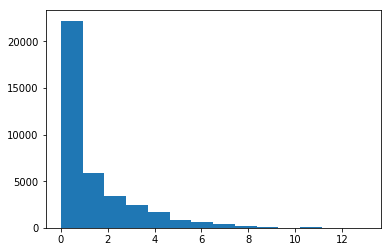

In [49]:
plt.hist(num_customers_line, bins=len(set(num_customers_line)))

(array([  1.32410000e+04,   8.98700000e+03,   5.87500000e+03,
          3.42800000e+03,   2.39500000e+03,   1.67000000e+03,
          8.49000000e+02,   6.15000000e+02,   3.92000000e+02,
          1.83000000e+02,   6.30000000e+01,   2.50000000e+01,
          6.10000000e+01,   8.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.]),
 <a list of 14 Patch objects>)

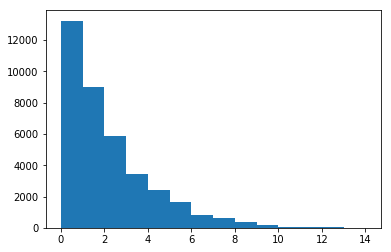

In [50]:
plt.hist(num_customers_system, bins=len(set(num_customers_line)))

In [51]:
counts_to_table(num_customers_system)

{0: 0.3503651566469094,
 1: 0.23780165114309906,
 2: 0.15545618120237087,
 3: 0.09070702794242168,
 4: 0.06337320067739204,
 5: 0.044189246401354784,
 6: 0.02246507197290432,
 7: 0.01627328535139712,
 8: 0.010372565622353938,
 9: 0.00484229466553768,
 10: 0.0016670194750211685,
 11: 0.0006615156646909399,
 12: 0.0016140982218458932,
 13: 0.00013230313293818797,
 14: 7.938187976291278e-05}

In [52]:
counts_to_table(num_customers_line)

{0: 0.5881668077900085,
 1: 0.15545618120237087,
 2: 0.09070702794242168,
 3: 0.06337320067739204,
 4: 0.044189246401354784,
 5: 0.02246507197290432,
 6: 0.01627328535139712,
 7: 0.010372565622353938,
 8: 0.00484229466553768,
 9: 0.0016670194750211685,
 10: 0.0006615156646909399,
 11: 0.0016140982218458932,
 12: 0.00013230313293818797,
 13: 7.938187976291278e-05}

In [53]:
np.mean(time_spent_in_queue)

13.962921348314607

In [54]:
np.mean(time_spent_in_system)

22.454494382022471

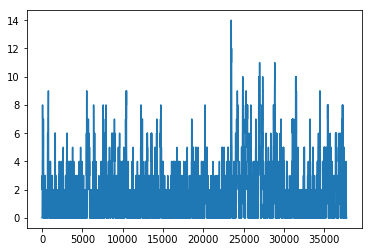

In [55]:
plt.plot(range(len(num_customers_system)), num_customers_system)

In [56]:
rolling_average = []
acc = 0.0
n = 1.0
for c in num_customers_system:
    acc += c
    rolling_average.append(acc/n)

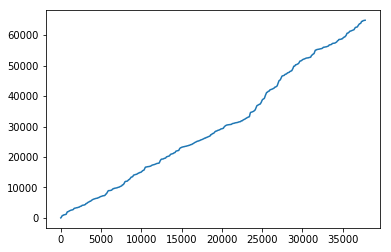

In [57]:
rolling_average = np.array(rolling_average)
plt.plot(range(len(rolling_average)), 
         rolling_average)

In [58]:
first_valid = 0
for i, c in enumerate(customer_arrival):
    if c >= 15000:
        first_valid = i
        break

In [59]:
first_valid

1227

In [60]:
steady_arrivals = customer_arrival[first_valid:]
steady_services = customer_service[first_valid:]
steady_departures = customer_departure[first_valid:]

In [61]:
times_in_service = steady_departures - steady_services[:len(steady_departures)]
times_in_queue = steady_services - steady_arrivals[:len(steady_services)]
times_in_system = steady_departures - steady_arrivals[:len(steady_departures)]

In [62]:
np.mean(times_in_queue)

15.249035576510931

In [63]:
np.mean(times_in_system)

23.94556365195028

In [64]:
utilization = sum(times_in_service) / (time_to_simulate - customer_arrival[first_valid])

In [65]:
print(utilization)

0.684953242632


In [66]:
np.mean(num_customers_line[customer_arrival[first_valid]:])

1.1739340447020594

In [67]:
np.mean(num_customers_system[customer_arrival[first_valid]:])

1.8316866464673078